In [9]:
from PIL import ImageFile
ImageFile.LOAD_TRUNCATED_IMAGES = True
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib as plt
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image
import numpy as np 
import pandas as pd 
import re
from tqdm import tqdm
from keras.models import Sequential
from keras.layers import Embedding,LSTM,Dense,SpatialDropout1D
from keras.layers import Conv1D

from keras.initializers import Constant
from keras.optimizers import Adam
from keras.callbacks import EarlyStopping, ReduceLROnPlateau
from keras.layers import (BatchNormalization,Dense,
                          TimeDistributed, Dropout, Bidirectional,Flatten, GlobalMaxPool1D)
from keras_preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from sklearn.utils import shuffle
from keras.utils import to_categorical
import os
from glob import glob 
import numpy as np
import os
import PIL.Image
import tensorflow as tf
import pathlib
import numpy as np
import pandas as pd
import os
import glob
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.cm as cm
from sklearn.cluster import KMeans
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from PIL import Image
from sklearn.model_selection import train_test_split
from imutils import paths
import numpy as np
import argparse
import imutils
import cv2
import os
from PIL import ImageFile
ImageFile.LOAD_TRUNCATED_IMAGES = True
from glob import glob 
pd.set_option('display.max_colwidth', 255)

# Model Comparisons

When it came to the data set I was working with, there were a few choices for models. First and foremost was the Convolutional Neural Network model (Deep learning).Another notable mention was KMeans, so I decided to attempt to implement that as well.

Below is the implementation of Kmeans algorithm on the same data as that used for the CNN. To help provide supporting justification 
for the use of a Convolutional Neural network model.Kmeans was described as a great algorithm for binary classification, specifically image classification.
But my model fit result suggested otherwise,at least at my current skill set and skill level. The fit model prediction hovered around 50%. 
It was then decided to attempt to use the CNN.


In [22]:
root_dir = "../Final_Project/Final_project_images/images/images/testab/catdogs"  # Root directory, where they all live
positives = '/Dogs'  # Since this is binary classification we have a positive and negative
negatives = '/Cats'
for file in os.listdir(root_dir):
	f_img = root_dir+"/"+file
	image_array1 = cv2.imread(os.path.join(f_img))
	label1 = file.split(os.path.sep)[-1].split(".")[0]


In [23]:
indices1 = np.where(image_array1!= [0])
coordinates1 = tuple(zip(indices1[0], indices1[1]))
data1 = np.asarray(coordinates1).reshape(-1,2)
labels_now = pd.read_csv('labelling',index_col=0)
labels_now= labels_now.to_numpy().flatten()
kmeans = KMeans(n_clusters=2, random_state=0, n_init="auto").fit(data1)
kmeans.cluster_centers_
labels10 = kmeans.labels_
correct_labels = sum(labels_now == labels10)
correct_labels/sum(labels_now)

0.5053218467293754

# Background on CNN models

Convolutional Neural Networks (CNN) specialize in processing data by using a grid like structure of layers and nodes. And just like the human brain they proccess simpler details first, followed by more complex. This same reasoning is why filter layers tend to increase as we go down the model so to speak.

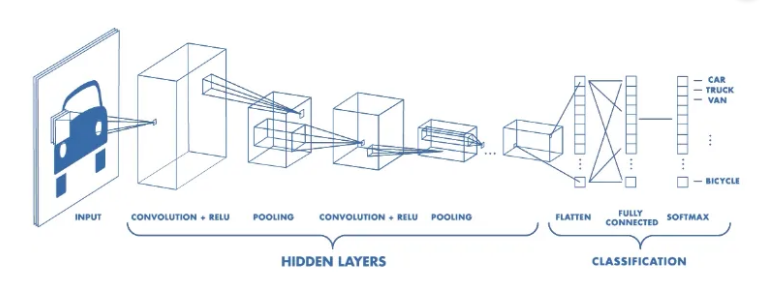

<sup><sub>https://towardsdatascience.com/convolutional-neural-networks-explained-9cc5188c4939#:~:text=A%20Convolutional%20Neural%20Network%2C%20also,binary%20representation%20of%20visual%20data.</sup></sub>

They are built with a combination of specialized layers which are illustrated above. `Convolution` is where the model performs computation, usually a dot product between two matrices. The `kernel` is what holds the math formula for application and when each pixel in the output image is a function of the nearby pixels (including itself) in the input image, the kernel is that function. It is s a 2D matrix that helps the model do math.  

The `pooling layer` shrinks the size of the input by a specified factor. The most popular being `Max pooling`, which takes the maximum value of the specified area.
"If we have an activation map of size W x W x D, a pooling kernel of spatial size F, and stride S, then the size of output volume can be determined by the following formula: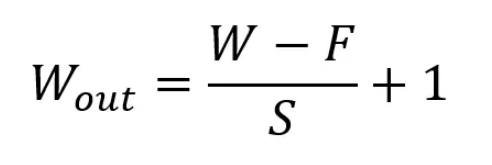


This will yield an output volume of size Wout x Wout x D.

Next is the `fully connected layer`, which means that neurons in that layer are connected to all neurons in the preceding layer.A weights matrix is applied to transform the input vector.

`Activation` layers apply nonlinear functions to otherwise linear activation map. `Sigmoid` is one of the functions available and normalizes the value to a range between [0,1]. `Relu` is another useful function which sets the threshold for activation to 0.

`Flattening` are also often used, which shape the output into a 1D array. 

# Model Building Proccess

With the huge amount of image data in this data set, figuring out how to partition it properly was a bit cumbersome at first.

Instead of the traditional train test split, I attempted to create folders for the train, validation and test sets which could be deleted at any time and then repopulated with new data. 

This allowed me to easily partition the test set of data without any risk of data leakage. 

I used the split folders function for the data partitioning. 
Copies of the original datasets sat in two specific folders to be pulled from, and the copies being moved prevented any crossover into other folders. 

## Now going to attempt to shuffle and split all of this

In [ ]:
# Training Val test folders
# # Creating Train / Val / Test folders (One time use)
root_dir = "../Final_Project/Final_project_images/"   # Root directory, where they all live
positives = '/dog_'  # Since this is binary classification we have a positive and negative
negatives = '/cat_'

import splitfolders
input_folder = "c:/Users/amcfa\gitfiles\Projects\MastersWork\Deep_Learning\Final_Project\Final_project_images\images\images" 


# Split with a ratio.
# To only split into training and validation set, set a tuple to `ratio`, i.e, (.8, .2).
# Train, val, test
splitfolders.ratio(input_folder, 
                   output="c:/Users/amcfa\gitfiles\Projects\MastersWork\Deep_Learning\Final_Project\Final_project_images\images\images",
                   seed=42, 
                   ratio=(.7, .2, .1), 
                   group_prefix=None,move=True) 


In [2]:
# Training Val test folders
# # Creating Train / Val / Test folders (One time use)
root_dir = "../Final_Project/Final_project_images/images/images/"   # Root directory, where they all live
train_path = root_dir+'train'  # Since this is binary classification we have a positive and negative
val_path= root_dir+'val'
test_path = root_dir+'test'

print(os.listdir(root_dir))

['Cats', 'Dogs', 'test', 'testab', 'train', 'val']


After the data was loaded in it needed some preprocessing to deal with the differing image sizes.
The imageDataGenerator utility was perfect for the task, the images were rescaled, and flipped in one go.

the rescaling variable helps to normalize the images setting them to a value between [0,1] which is useful if the data being analyzed varies heavily. Which the image data does, being differently sized. 
The images are also occasionally flipped horizontally and vertically.

The flow from directory utility is used to feed the model the images so to speak. Since the pictures are in color the color mode is plain old rgb. 
And since the problem is binary classification, the class mode is set to binary.

My chosen image size is 200, and the batch size I chose was 10. It made the model a bit slower but all models performed well right out of the gate using these parameters. Below is the message that prints after the files are loaded into the generators.

In [3]:
image_size = 200


train_batch_size = 10
val_batch_size = 10
datagen = ImageDataGenerator(rescale=1.0/255,
                             horizontal_flip=True,
                             vertical_flip=True)

train_gen = datagen.flow_from_directory(train_path,
                                        target_size=(image_size,image_size),
                                        color_mode='rgb',
                                        batch_size=train_batch_size,
                                        
                                        class_mode='binary')

val_gen = datagen.flow_from_directory(val_path,
                                        target_size=(image_size,image_size),
                                        color_mode='rgb',
                                        batch_size=val_batch_size,
                                        
                                        class_mode='binary')

# Note: shuffle=False causes the test dataset to not be shuffled
test_gen = datagen.flow_from_directory(test_path,
                                        target_size=(image_size,image_size),
                                        color_mode='rgb',
                                        
                                        batch_size=1,
                                        class_mode='binary',
                                        shuffle=False)

Found 16616 images belonging to 2 classes.
Found 4745 images belonging to 2 classes.
Found 2367 images belonging to 2 classes.


In [4]:
train_path_dogs = root_dir+'train/Dogs'
train_path_cats = root_dir+'train/Cats' # Since this is binary classification we have a positive and negative
val_path_dogs= root_dir+'val/Dogs'
val_path_cats = root_dir +'val/Cats'
test_path_dogs = root_dir+'test/Dogs'
test_path_cats = root_dir+'test/Cats'
## Now to make a dataframe with all of the needed paths
train_df_dogs = pd.DataFrame({'path': glob(os.path.join(train_path_dogs,'*.jpg'))})
train_df_cats = pd.DataFrame({'path': glob(os.path.join(train_path_cats,'*.jpg'))})
val_df_dogs = pd.DataFrame({'path': glob(os.path.join(val_path_dogs,'*.jpg'))})
val_df_cats = pd.DataFrame({'path': glob(os.path.join(val_path_cats,'*.jpg'))})
test_df_dogs = pd.DataFrame({'path': glob(os.path.join(test_path_dogs,'*.jpg'))})
test_df_cats = pd.DataFrame({'path': glob(os.path.join(test_path_cats,'*.jpg'))})
train_df_dogs['label']= 0
train_df_cats['label']= 1
val_df_dogs['label'] = 0
val_df_cats['label'] = 1
test_df_dogs['label'] = 0
test_df_cats['label'] = 1

train_df = shuffle(pd.concat([train_df_dogs, train_df_cats], axis=0).reset_index(drop=True))
val_df = shuffle(pd.concat([val_df_dogs, val_df_cats], axis=0).reset_index(drop=True))
test_df = shuffle(pd.concat([test_df_dogs,test_df_cats],axis = 0).reset_index(drop=True))

## My first Model


Initial Model summary
* Kernel size = (3,3)
	* Kernel Size determines the number of pixels the filter covers. For example the 3,3 kernel size used for this project covers a 3X3 region of the image.
	* While it makes the run time longer for the model the accuracy is improved for smaller filters over larger ones.
* Pool size =(2,2)
	* Will reduce the size of the input by a factor of 2. Max pooling is also used which returns the maximum output for the specified area.
* Filters =(32,64,128)
	* There will also be 3 filters applied. Which get larger as the layers get deeper. 
	* The purpose of filters is to help the model capture details. 
	* The first few layers capture simpler details. As the model moves down the layers, or rather they deepen it is able to capture more complex patterns.
* Dropout Factors(0.3,0.5)
	* The probability that a neuron is shut off during the droput phase in the model. Helps prevent overfitting.
* Activation functions- (Relu and sigmoid) 
	* Relu - helps speed up training by setting the threshold of the activation function to 0.
	* Sigmoid - Normalizes the numbers obtained to a value between [0,1].
* Optimization method (Adam)
	* Stochastic gradient descent, with a learning rate of 0.001, and binary crossentropy loss function.
* Misc.Params 
	* Early stop function to help prevent overfitting if there is no change in accuracy.
	* Learning Rate adjustment - if the model plateus while learning the learning rate can adjust and slow down.


This model has a total of 3372033 total parameters. When all was said and done. 

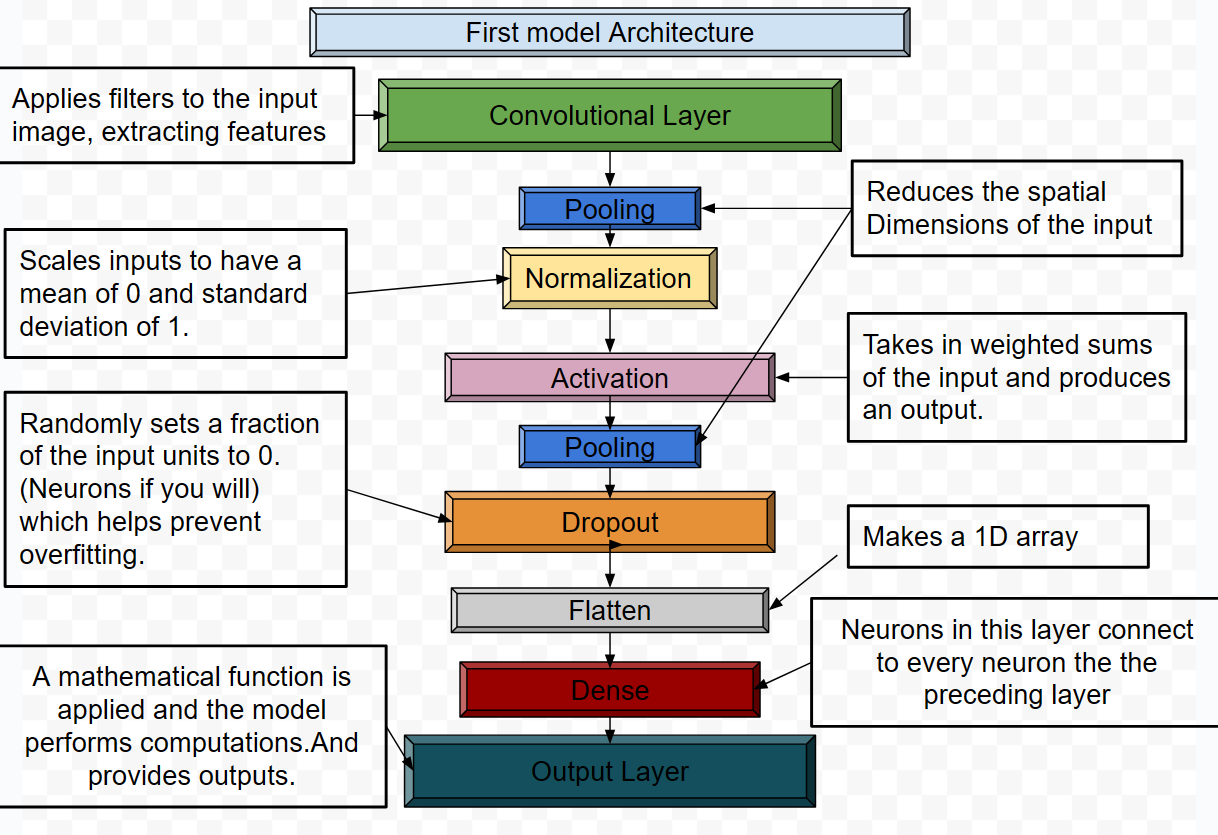









In [11]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, BatchNormalization, Activation
from keras.layers import Conv2D, MaxPool2D
from keras.optimizers import RMSprop, Adam
from keras_visualizer import visualizer


kernel_size = (3,3) 
pool_size= (2,2)
first_filter = 32
second_filter = 64
third_filter = 128

dropout_conv = 0.3 # First model
dropout_dense = 0.5

model = Sequential()
model.add(Conv2D(first_filter, kernel_size, activation = 'relu', input_shape = (image_size, image_size, 3)))
model.add(MaxPool2D(pool_size = pool_size)) 
model.add(BatchNormalization())
model.add(Activation("relu"))
model.add(MaxPool2D(pool_size = pool_size))
model.add(Dropout(dropout_conv))

model.add(Conv2D(second_filter, kernel_size, use_bias=False))
model.add(MaxPool2D(pool_size = pool_size))
model.add(BatchNormalization())
model.add(Activation("relu"))
model.add(Dropout(dropout_conv))

model.add(Conv2D(third_filter, kernel_size, use_bias=False))
model.add(MaxPool2D(pool_size = pool_size))
model.add(BatchNormalization())
model.add(Activation("relu"))
model.add(Dropout(dropout_conv))

model.add(Flatten())
model.add(Dense(256, use_bias=False))
model.add(BatchNormalization())
model.add(Activation("relu"))
model.add(Dropout(dropout_dense))
model.add(Dense(1, activation = "sigmoid"))
print(model.summary())

model.compile(Adam(0.001), loss = "binary_crossentropy", metrics=["accuracy"])




Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_9 (Conv2D)           (None, 198, 198, 32)      896       
                                                                 
 max_pooling2d_12 (MaxPooli  (None, 99, 99, 32)        0         
 ng2D)                                                           
                                                                 
 batch_normalization_12 (Ba  (None, 99, 99, 32)        128       
 tchNormalization)                                               
                                                                 
 activation_12 (Activation)  (None, 99, 99, 32)        0         
                                                                 
 max_pooling2d_13 (MaxPooli  (None, 49, 49, 32)        0         
 ng2D)                                                           
                                                      

In [12]:
sample_numbers = len(train_df)
val_numbers = len(val_df)
train_steps = np.ceil(sample_numbers / train_batch_size)
val_steps = np.ceil(val_numbers / val_batch_size)
from keras.callbacks import EarlyStopping, ReduceLROnPlateau
earlystopper = EarlyStopping(monitor='val_accuracy', patience=3, verbose=1, restore_best_weights=True)
reducel = ReduceLROnPlateau(monitor='val_accuracy', factor = 0.0001, verbose = 1, patience = 1,min_lr = 0.000000001)
model_1 = model.fit(train_gen, steps_per_epoch=train_steps, 
                    validation_data=val_gen,
                    validation_steps=val_steps,
                    epochs=50,
                    callbacks=[reducel, earlystopper])

Epoch 1/50
1662/1662 [==============================] - 163s 97ms/step - loss: 0.6347 - accuracy: 0.6648 - val_loss: 0.8214 - val_accuracy: 0.5357 - lr: 0.0010
Epoch 2/50
1662/1662 [==============================] - 165s 99ms/step - loss: 0.5319 - accuracy: 0.7350 - val_loss: 0.8311 - val_accuracy: 0.5747 - lr: 0.0010
Epoch 3/50
1662/1662 [==============================] - 171s 103ms/step - loss: 0.5021 - accuracy: 0.7576 - val_loss: 0.7455 - val_accuracy: 0.6023 - lr: 0.0010
Epoch 4/50
1662/1662 [==============================] - 170s 102ms/step - loss: 0.4745 - accuracy: 0.7770 - val_loss: 0.4183 - val_accuracy: 0.8160 - lr: 0.0010
Epoch 5/50
1662/1662 [==============================] - ETA: 0s - loss: 0.4562 - accuracy: 0.7873
Epoch 5: ReduceLROnPlateau reducing learning rate to 1.0000000474974514e-07.
1662/1662 [==============================] - 163s 98ms/step - loss: 0.4562 - accuracy: 0.7873 - val_loss: 0.7859 - val_accuracy: 0.6013 - lr: 0.0010
Epoch 6/50
1662/1662 [============

In [17]:
from sklearn.metrics import roc_curve, auc, roc_auc_score
import matplotlib.pyplot as plt

In [18]:
y_pred = model.predict(test_gen, steps=len(test_df), verbose=1)

fpr_keras, tpr_keras, thresholds_keras = roc_curve(test_gen.classes, y_pred)
auc_keras = auc(fpr_keras, tpr_keras)
auc_keras


2367/2367 [==============================] - 14s 6ms/step


0.889832166274474

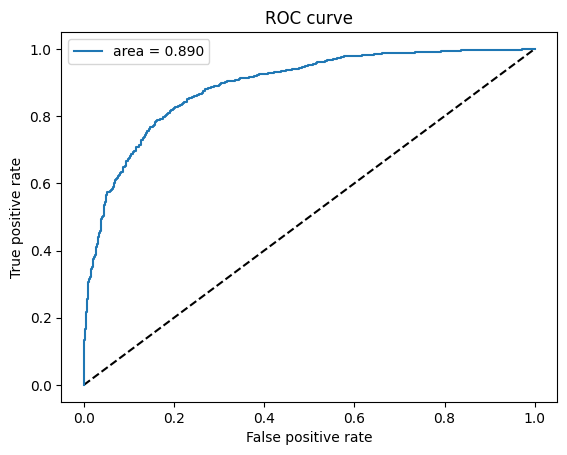

<Figure size 640x480 with 0 Axes>

In [23]:
plt.figure(1)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr_keras, tpr_keras, label='area = {:.3f}'.format(auc_keras))
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.legend(loc='best')
plt.show()
plt.savefig('Roc_Curve_myData1')

In [21]:
mse = tf.keras.losses.MeanSquaredError()
mse(test_gen.classes, y_pred).numpy()


0.34277105

In [84]:
lop=tf.math.confusion_matrix(y_pred, test_gen.classes,num_classes=2)
y_tru=np.round(test_gen.classes).astype(int).reshape(2367)

In [85]:
y_pred1=np.round(y_pred).astype(int).reshape(2367)

In [97]:
from sklearn.metrics import classification_report
report1 = (classification_report(y_tru, y_pred1,output_dict=True))
report_table1= pd.DataFrame(report1)

In [98]:
report_table1.to_csv('report_table1')

<AxesSubplot: >

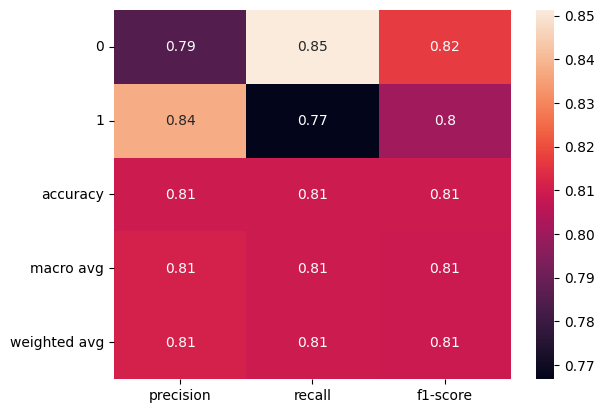

In [94]:
sns.heatmap(pd.DataFrame(report1).iloc[:-1, :].T, annot=True)

In [56]:
test_gen.classes

array([0, 0, 0, ..., 1, 1, 1])

In [99]:
kernel_size = (3,3)
pool_size= (2,2)
first_filter = 32
second_filter = 64
third_filter = 128

dropout_conv = 0.1
dropout_dense = 0.2

model2 = Sequential()
model2.add(Conv2D(first_filter, kernel_size, activation = 'relu', input_shape = (image_size, image_size, 3)))
model2.add(MaxPool2D(pool_size = pool_size)) 
model2.add(BatchNormalization())
model2.add(Activation("relu"))
model2.add(MaxPool2D(pool_size = pool_size))
model2.add(Dropout(dropout_conv))

model2.add(Conv2D(second_filter, kernel_size, use_bias=False))
model2.add(MaxPool2D(pool_size = pool_size))
model2.add(BatchNormalization())
model2.add(Activation("relu"))
model2.add(Dropout(dropout_conv))

model2.add(Conv2D(third_filter, kernel_size, use_bias=False))
model2.add(MaxPool2D(pool_size = pool_size))
model2.add(BatchNormalization())
model2.add(Activation("relu"))
model2.add(Dropout(dropout_conv))

model2.add(Flatten())
model2.add(Dense(256, use_bias=False))
model2.add(BatchNormalization())
model2.add(Activation("relu"))
model2.add(Dropout(dropout_dense))
model2.add(Dense(1, activation = "sigmoid"))
print(model2.summary())
model2.compile(Adam(0.001), loss = "binary_crossentropy", metrics=["accuracy"])

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_15 (Conv2D)          (None, 198, 198, 32)      896       
                                                                 
 max_pooling2d_20 (MaxPooli  (None, 99, 99, 32)        0         
 ng2D)                                                           
                                                                 
 batch_normalization_20 (Ba  (None, 99, 99, 32)        128       
 tchNormalization)                                               
                                                                 
 activation_20 (Activation)  (None, 99, 99, 32)        0         
                                                                 
 max_pooling2d_21 (MaxPooli  (None, 49, 49, 32)        0         
 ng2D)                                                           
                                                      

In [100]:
sample_numbers = len(train_df)
val_numbers = len(val_df)
train_steps = np.ceil(sample_numbers / train_batch_size)
val_steps = np.ceil(val_numbers / val_batch_size)
from keras.callbacks import EarlyStopping, ReduceLROnPlateau
earlystopper = EarlyStopping(monitor='val_accuracy', patience=3, verbose=1, restore_best_weights=True)
reducel = ReduceLROnPlateau(monitor = 'val_accuracy', factor = 0.0001, verbose = 1, patience = 1,min_lr = 0.000000001)
model_2 = model2.fit(train_gen, steps_per_epoch=train_steps, 
                    validation_data=val_gen,
                    validation_steps=val_steps,
                    epochs=50,
                    callbacks=[reducel, earlystopper])

Epoch 1/50
1087/1662 [==================>...........] - ETA: 54s - loss: 0.6291 - accuracy: 0.6630

c:\gitfiles\Lib\site-packages\PIL\TiffImagePlugin.py:858: UserWarning: Truncated File Read
  warnings.warn(str(msg))


1662/1662 [==============================] - 170s 102ms/step - loss: 0.6031 - accuracy: 0.6836 - val_loss: 0.5632 - val_accuracy: 0.7174 - lr: 0.0010
Epoch 2/50
1662/1662 [==============================] - ETA: 0s - loss: 0.5119 - accuracy: 0.7530
Epoch 2: ReduceLROnPlateau reducing learning rate to 1.0000000474974514e-07.
1662/1662 [==============================] - 169s 101ms/step - loss: 0.5119 - accuracy: 0.7530 - val_loss: 0.7023 - val_accuracy: 0.6647 - lr: 0.0010
Epoch 3/50
1662/1662 [==============================] - 168s 101ms/step - loss: 0.4760 - accuracy: 0.7704 - val_loss: 0.4469 - val_accuracy: 0.7945 - lr: 1.0000e-07
Epoch 4/50
1662/1662 [==============================] - ETA: 0s - loss: 0.4751 - accuracy: 0.7746
Epoch 4: ReduceLROnPlateau reducing learning rate to 1e-09.
1662/1662 [==============================] - 169s 102ms/step - loss: 0.4751 - accuracy: 0.7746 - val_loss: 0.4458 - val_accuracy: 0.7907 - lr: 1.0000e-07
Epoch 5/50
1662/1662 [==========================

In [101]:
y_pred = model2.predict(test_gen, steps=len(test_df), verbose=1)

fpr_keras, tpr_keras, thresholds_keras = roc_curve(test_gen.classes, y_pred)
auc_keras = auc(fpr_keras, tpr_keras)
auc_keras

2367/2367 [==============================] - 14s 6ms/step


0.8785004626350781

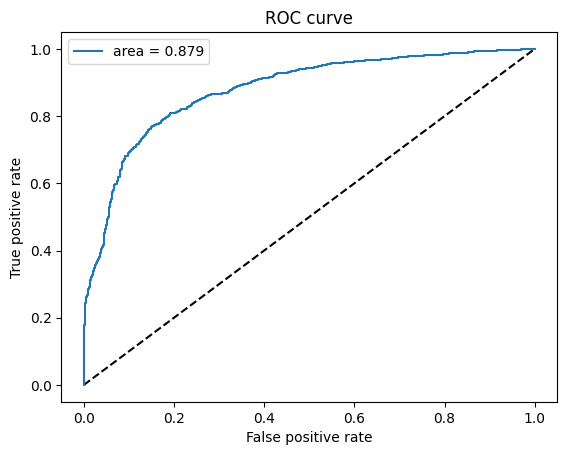

<Figure size 640x480 with 0 Axes>

In [102]:
plt.figure(1)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr_keras, tpr_keras, label='area = {:.3f}'.format(auc_keras))
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.legend(loc='best')
plt.show()
plt.savefig('Roc_Curve_myData2')

In [103]:
y_tru=np.round(test_gen.classes).astype(int).reshape(2367)
y_pred1=np.round(y_pred).astype(int).reshape(2367)

In [104]:
from sklearn.metrics import classification_report
report1 = (classification_report(y_tru, y_pred1,output_dict=True))
report_table1= pd.DataFrame(report1)
report_table1.to_csv('report_table2')

In [105]:
kernel_size = (3,3)
pool_size= (2,2)
first_filter = 16
second_filter = 32
third_filter = 64
fourth_filter= 128


dropout_conv = 0.1
dropout_dense = 0.2

model3 = Sequential()
model3.add(Conv2D(first_filter, kernel_size, activation = 'relu', input_shape = (image_size, image_size, 3)))
model3.add(MaxPool2D(pool_size = pool_size)) 
model3.add(BatchNormalization())
model3.add(Activation("relu"))
model3.add(MaxPool2D(pool_size = pool_size))
model3.add(Dropout(dropout_conv))

model3.add(Conv2D(second_filter, kernel_size, use_bias=False))
model3.add(MaxPool2D(pool_size = pool_size))
model3.add(BatchNormalization())
model3.add(Activation("relu"))
model3.add(Dropout(dropout_conv))

model3.add(Conv2D(third_filter, kernel_size, use_bias=False))
model3.add(MaxPool2D(pool_size = pool_size))
model3.add(BatchNormalization())
model3.add(Activation("relu"))
model3.add(Dropout(dropout_conv))

model3.add(Conv2D(fourth_filter, kernel_size, use_bias=False))
model3.add(MaxPool2D(pool_size = pool_size))
model3.add(BatchNormalization())
model3.add(Activation("relu"))
model3.add(Dropout(dropout_conv))


model3.add(Flatten())
model3.add(Dense(256, use_bias=False))
model3.add(BatchNormalization())
model3.add(Activation("relu"))
model3.add(Dropout(dropout_dense))
model3.add(Dense(1, activation = "sigmoid"))
print(model3.summary())
model3.compile(Adam(0.001), loss = "binary_crossentropy", metrics=["accuracy"])

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_18 (Conv2D)          (None, 198, 198, 16)      448       
                                                                 
 max_pooling2d_24 (MaxPooli  (None, 99, 99, 16)        0         
 ng2D)                                                           
                                                                 
 batch_normalization_24 (Ba  (None, 99, 99, 16)        64        
 tchNormalization)                                               
                                                                 
 activation_24 (Activation)  (None, 99, 99, 16)        0         
                                                                 
 max_pooling2d_25 (MaxPooli  (None, 49, 49, 16)        0         
 ng2D)                                                           
                                                      

In [106]:
sample_numbers = len(train_df)
val_numbers = len(val_df)
train_steps = np.ceil(sample_numbers / train_batch_size)
val_steps = np.ceil(val_numbers / val_batch_size)
from keras.callbacks import EarlyStopping, ReduceLROnPlateau
earlystopper = EarlyStopping(monitor='val_accuracy', patience=3, verbose=1, restore_best_weights=True)
reducel = ReduceLROnPlateau(monitor = 'val_accuracy', factor = 0.0001, verbose = 1, patience = 1,min_lr = 0.000000001,mode='max')
model_3 = model3.fit(train_gen, steps_per_epoch=train_steps, 
                    validation_data=val_gen,
                    validation_steps=val_steps,
                    epochs=50,
                    callbacks=[reducel, earlystopper])

Epoch 1/50
1554/1662 [===========================>..] - ETA: 5s - loss: 0.6243 - accuracy: 0.6683

c:\gitfiles\Lib\site-packages\PIL\TiffImagePlugin.py:858: UserWarning: Truncated File Read
  warnings.warn(str(msg))


1662/1662 [==============================] - 95s 56ms/step - loss: 0.6194 - accuracy: 0.6723 - val_loss: 0.6545 - val_accuracy: 0.6499 - lr: 0.0010
Epoch 2/50
1662/1662 [==============================] - 88s 53ms/step - loss: 0.5108 - accuracy: 0.7514 - val_loss: 0.5679 - val_accuracy: 0.7071 - lr: 0.0010
Epoch 3/50
1662/1662 [==============================] - 92s 55ms/step - loss: 0.4612 - accuracy: 0.7835 - val_loss: 0.4255 - val_accuracy: 0.8124 - lr: 0.0010
Epoch 4/50
1662/1662 [==============================] - ETA: 0s - loss: 0.4374 - accuracy: 0.7983
Epoch 4: ReduceLROnPlateau reducing learning rate to 1.0000000474974514e-07.
1662/1662 [==============================] - 91s 55ms/step - loss: 0.4374 - accuracy: 0.7983 - val_loss: 0.6406 - val_accuracy: 0.6835 - lr: 0.0010
Epoch 5/50
1662/1662 [==============================] - 90s 54ms/step - loss: 0.4091 - accuracy: 0.8160 - val_loss: 0.3808 - val_accuracy: 0.8234 - lr: 1.0000e-07
Epoch 6/50
1662/1662 [==========================

In [107]:
y_pred = model3.predict(test_gen, steps=len(test_df), verbose=1)

fpr_keras, tpr_keras, thresholds_keras = roc_curve(test_gen.classes, y_pred)
auc_keras = auc(fpr_keras, tpr_keras)
auc_keras

2367/2367 [==============================] - 9s 4ms/step


0.9183898871398872

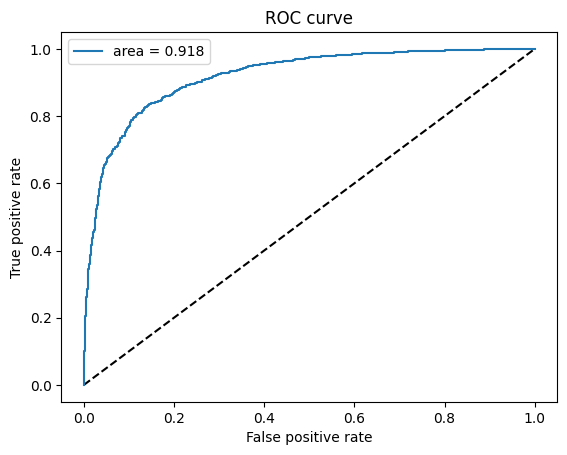

<Figure size 640x480 with 0 Axes>

In [108]:

plt.figure(1)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr_keras, tpr_keras, label='area = {:.3f}'.format(auc_keras))
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.legend(loc='best')
plt.show()
plt.savefig('Roc_Curve_myData3')
y_tru=np.round(test_gen.classes).astype(int).reshape(2367)
y_pred1=np.round(y_pred).astype(int).reshape(2367)
from sklearn.metrics import classification_report
report1 = (classification_report(y_tru, y_pred1,output_dict=True))
report_table1= pd.DataFrame(report1)
report_table1.to_csv('report_table3')

In [109]:
kernel_size = (3,3)
pool_size= (2,2)
first_filter = 16
second_filter = 32
third_filter = 64
fourth_filter= 128

dropout_conv = 0.1
dropout_dense = 0.3

model4 = Sequential()
model4.add(Conv2D(first_filter, kernel_size, activation = 'relu', input_shape = (image_size, image_size, 3)))
model4.add(MaxPool2D(pool_size = pool_size))
model4.add(BatchNormalization())
model4.add(Activation("relu"))
model4.add(MaxPool2D(pool_size = pool_size))
model4.add(Dropout(dropout_conv))


model4.add(Conv2D(second_filter, kernel_size, use_bias=False))
model4.add(MaxPool2D(pool_size = pool_size))
model4.add(BatchNormalization())
model4.add(Activation("relu"))
model4.add(Dropout(dropout_conv))


model4.add(Conv2D(third_filter, kernel_size, use_bias=False))
model4.add(MaxPool2D(pool_size = pool_size))
model4.add(BatchNormalization())
model4.add(Activation("relu"))
model4.add(Dropout(dropout_conv))


model4.add(Conv2D(fourth_filter, kernel_size, use_bias=False))
model4.add(MaxPool2D(pool_size = pool_size))
model4.add(BatchNormalization())
model4.add(Activation("relu"))
model4.add(Dropout(dropout_conv))

model4.add(Flatten())
model4.add(Dense(256, use_bias=False))
model4.add(BatchNormalization())
model4.add(Activation("relu"))
model4.add(Dropout(dropout_dense))
model4.add(Dense(1, activation = "sigmoid"))


model4.compile(Adam(0.001), loss = "binary_crossentropy", metrics=["accuracy"])
print(model4.summary())

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_22 (Conv2D)          (None, 198, 198, 16)      448       
                                                                 
 max_pooling2d_29 (MaxPooli  (None, 99, 99, 16)        0         
 ng2D)                                                           
                                                                 
 batch_normalization_29 (Ba  (None, 99, 99, 16)        64        
 tchNormalization)                                               
                                                                 
 activation_29 (Activation)  (None, 99, 99, 16)        0         
                                                                 
 max_pooling2d_30 (MaxPooli  (None, 49, 49, 16)        0         
 ng2D)                                                           
                                                      

In [110]:
sample_numbers = len(train_df)
val_numbers = len(val_df)
train_steps = np.ceil(sample_numbers / train_batch_size)
val_steps = np.ceil(val_numbers / val_batch_size)
from keras.callbacks import EarlyStopping, ReduceLROnPlateau
earlystopper = EarlyStopping(monitor='val_accuracy', patience=3, verbose=1, restore_best_weights=True)
reducel = ReduceLROnPlateau(monitor = 'val_accuracy', factor = 0.0001, verbose = 1, patience = 1,min_lr = 0.000000001)
model_4 = model4.fit_generator(train_gen, steps_per_epoch=train_steps, 
                    validation_data=val_gen,
                    validation_steps=val_steps,
                    epochs=50,
                    callbacks=[reducel, earlystopper])

Epoch 1/50


C:\Users\amcfa\AppData\Local\Temp\ipykernel_13504\1763026974.py:8: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  model_4 = model4.fit_generator(train_gen, steps_per_epoch=train_steps,


1602/1662 [===========================>..] - ETA: 3s - loss: 0.6268 - accuracy: 0.6698

c:\gitfiles\Lib\site-packages\PIL\TiffImagePlugin.py:858: UserWarning: Truncated File Read
  warnings.warn(str(msg))


1662/1662 [==============================] - 100s 60ms/step - loss: 0.6241 - accuracy: 0.6720 - val_loss: 0.6916 - val_accuracy: 0.6017 - lr: 0.0010
Epoch 2/50
1662/1662 [==============================] - 94s 56ms/step - loss: 0.5172 - accuracy: 0.7443 - val_loss: 0.5920 - val_accuracy: 0.6866 - lr: 0.0010
Epoch 3/50
1662/1662 [==============================] - 93s 56ms/step - loss: 0.4592 - accuracy: 0.7840 - val_loss: 0.4443 - val_accuracy: 0.7911 - lr: 0.0010
Epoch 4/50
1662/1662 [==============================] - 95s 57ms/step - loss: 0.4242 - accuracy: 0.8071 - val_loss: 0.3849 - val_accuracy: 0.8339 - lr: 0.0010
Epoch 5/50
1662/1662 [==============================] - ETA: 0s - loss: 0.4019 - accuracy: 0.8188
Epoch 5: ReduceLROnPlateau reducing learning rate to 1.0000000474974514e-07.
1662/1662 [==============================] - 94s 57ms/step - loss: 0.4019 - accuracy: 0.8188 - val_loss: 0.5567 - val_accuracy: 0.6872 - lr: 0.0010
Epoch 6/50
1662/1662 [=============================

In [111]:
y_pred = model4.predict(test_gen, steps=len(test_df), verbose=1)

fpr_keras, tpr_keras, thresholds_keras = roc_curve(test_gen.classes, y_pred)
auc_keras = auc(fpr_keras, tpr_keras)
auc_keras

2367/2367 [==============================] - 9s 4ms/step


0.9194772223618377

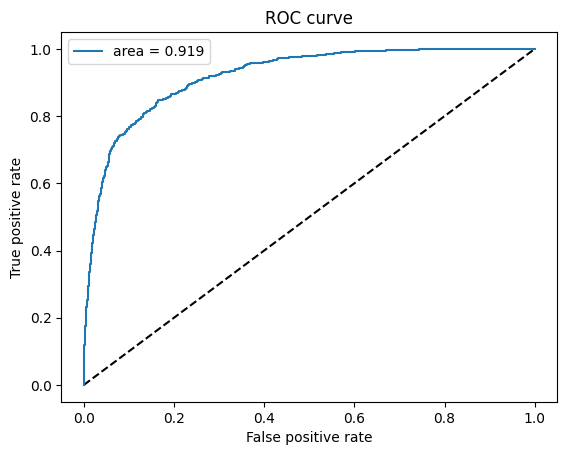

<Figure size 640x480 with 0 Axes>

In [112]:

plt.figure(1)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr_keras, tpr_keras, label='area = {:.3f}'.format(auc_keras))
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.legend(loc='best')
plt.show()
plt.savefig('Roc_Curve_myData4')
y_tru=np.round(test_gen.classes).astype(int).reshape(2367)
y_pred1=np.round(y_pred).astype(int).reshape(2367)
from sklearn.metrics import classification_report
report1 = (classification_report(y_tru, y_pred1,output_dict=True))
report_table1= pd.DataFrame(report1)
report_table1.to_csv('report_table4')

In [113]:
kernel_size = (3,3)
pool_size= (2,2)
first_filter = 16
second_filter = 32
third_filter = 64
fourth_filter= 128
fifth_filter = 256
dropout_conv = 0.1
dropout_dense = 0.3

model5 = Sequential()
model5.add(Conv2D(first_filter, kernel_size, activation = 'relu', input_shape = (image_size, image_size, 3)))
model5.add(MaxPool2D(pool_size = pool_size))
model5.add(BatchNormalization())
model5.add(Activation("relu"))
model5.add(MaxPool2D(pool_size = pool_size))
model5.add(Dropout(dropout_conv))




model5.add(Conv2D(second_filter, kernel_size, use_bias=False))
model5.add(MaxPool2D(pool_size = pool_size))
model5.add(BatchNormalization())
model5.add(Activation("relu"))
model5.add(Dropout(dropout_conv))




model5.add(Conv2D(third_filter, kernel_size, use_bias=False))
model5.add(MaxPool2D(pool_size = pool_size))
model5.add(BatchNormalization())
model5.add(Activation("relu"))
model5.add(Dropout(dropout_conv))




model5.add(Conv2D(fourth_filter, kernel_size, use_bias=False))
model5.add(MaxPool2D(pool_size = pool_size))
model5.add(BatchNormalization())
model5.add(Activation("relu"))
model5.add(Dropout(dropout_conv))

model5.add(Conv2D(fifth_filter, kernel_size, use_bias=False))
model5.add(MaxPool2D(pool_size = pool_size))
model5.add(BatchNormalization())
model5.add(Activation("relu"))
model5.add(Dropout(dropout_conv))

model5.add(Flatten())
model5.add(Dense(256, use_bias=False))
model5.add(BatchNormalization())
model5.add(Activation("relu"))
model5.add(Dropout(dropout_dense))
model5.add(Dense(1, activation = "sigmoid"))




model5.compile(Adam(0.001), loss = "binary_crossentropy", metrics=["accuracy"])
print(model5.summary())

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_26 (Conv2D)          (None, 198, 198, 16)      448       
                                                                 
 max_pooling2d_34 (MaxPooli  (None, 99, 99, 16)        0         
 ng2D)                                                           
                                                                 
 batch_normalization_34 (Ba  (None, 99, 99, 16)        64        
 tchNormalization)                                               
                                                                 
 activation_34 (Activation)  (None, 99, 99, 16)        0         
                                                                 
 max_pooling2d_35 (MaxPooli  (None, 49, 49, 16)        0         
 ng2D)                                                           
                                                      

In [119]:
sample_numbers = len(train_df)
val_numbers = len(val_df)
train_steps = np.ceil(sample_numbers / train_batch_size)
val_steps = np.ceil(val_numbers / val_batch_size)
from keras.callbacks import EarlyStopping, ReduceLROnPlateau
earlystopper = EarlyStopping(monitor='val_accuracy', patience=3, verbose=2, restore_best_weights=True)
reducel = ReduceLROnPlateau(monitor = 'val_accuracy', factor = 0.0001, verbose = 2, patience = 1,min_lr = 0.000000001)
model_5 = model5.fit(train_gen, steps_per_epoch=train_steps, 
                    validation_data=val_gen,
                    validation_steps=val_steps,
                    epochs=50,
                    callbacks=[reducel, earlystopper])

Epoch 1/50
1662/1662 [==============================] - 88s 53ms/step - loss: 0.4523 - accuracy: 0.7945 - val_loss: 0.4251 - val_accuracy: 0.8051 - lr: 1.0000e-09
Epoch 2/50
1662/1662 [==============================] - 86s 52ms/step - loss: 0.4469 - accuracy: 0.7990 - val_loss: 0.4236 - val_accuracy: 0.8057 - lr: 1.0000e-09
Epoch 3/50
1662/1662 [==============================] - 86s 51ms/step - loss: 0.4548 - accuracy: 0.7938 - val_loss: 0.4232 - val_accuracy: 0.8038 - lr: 1.0000e-09
Epoch 4/50
1662/1662 [==============================] - 86s 52ms/step - loss: 0.4488 - accuracy: 0.7925 - val_loss: 0.4303 - val_accuracy: 0.8053 - lr: 1.0000e-09
Epoch 5/50
1662/1662 [==============================] - 89s 54ms/step - loss: 0.4454 - accuracy: 0.7986 - val_loss: 0.4240 - val_accuracy: 0.8101 - lr: 1.0000e-09
Epoch 6/50
1662/1662 [==============================] - 89s 53ms/step - loss: 0.4472 - accuracy: 0.7968 - val_loss: 0.4299 - val_accuracy: 0.8015 - lr: 1.0000e-09
Epoch 7/50
1662/1662 [

In [120]:
y_pred = model5.predict(test_gen, steps=len(test_df), verbose=1)

fpr_keras, tpr_keras, thresholds_keras = roc_curve(test_gen.classes, y_pred)
auc_keras = auc(fpr_keras, tpr_keras)
auc_keras

2367/2367 [==============================] - 9s 4ms/step


0.9072887870964794

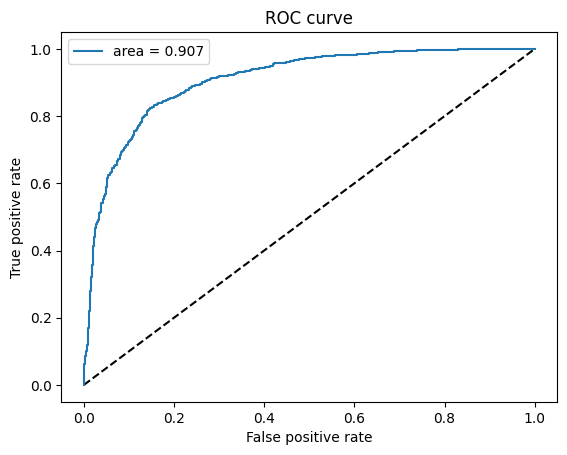

<Figure size 640x480 with 0 Axes>

In [121]:

plt.figure(1)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr_keras, tpr_keras, label='area = {:.3f}'.format(auc_keras))
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.legend(loc='best')
plt.show()
plt.savefig('Roc_Curve_myData5')
y_tru=np.round(test_gen.classes).astype(int).reshape(2367)
y_pred1=np.round(y_pred).astype(int).reshape(2367)
from sklearn.metrics import classification_report
report1 = (classification_report(y_tru, y_pred1,output_dict=True))
report_table1= pd.DataFrame(report1)
report_table1.to_csv('report_table5')

In [122]:
kernel_size = (3,3)
pool_size= (2,2)
first_filter = 16
second_filter = 32
third_filter = 64
fourth_filter= 128
fifth_filter = 256
dropout_conv = 0.1
dropout_dense = 0.3


model6 = Sequential()
model6.add(Conv2D(first_filter, kernel_size, activation = 'relu', input_shape = (image_size, image_size, 3)))
model6.add(MaxPool2D(pool_size = pool_size))
model6.add(BatchNormalization())
model6.add(Activation("relu"))
model6.add(MaxPool2D(pool_size = pool_size))
model6.add(Dropout(dropout_conv))


model6.add(Conv2D(second_filter, kernel_size, use_bias=False))
model6.add(MaxPool2D(pool_size = pool_size))
model6.add(BatchNormalization())
model6.add(Activation("relu"))
model6.add(Dropout(dropout_conv))

model6.add(Conv2D(third_filter, kernel_size, use_bias=False))
model6.add(MaxPool2D(pool_size = pool_size))
model6.add(BatchNormalization())
model6.add(Activation("relu"))
model6.add(Dropout(dropout_conv))




model6.add(Conv2D(fourth_filter, kernel_size, use_bias=False))
model6.add(MaxPool2D(pool_size = pool_size))
model6.add(BatchNormalization())
model6.add(Activation("relu"))
model6.add(Dropout(dropout_conv))


model6.add(Conv2D(fifth_filter, kernel_size, use_bias=False))
model6.add(MaxPool2D(pool_size = pool_size))
model6.add(BatchNormalization())
model6.add(Activation("relu"))
model6.add(Dropout(dropout_conv))


model6.add(Flatten())
model6.add(Dense(256, use_bias=False))
model6.add(BatchNormalization())
model6.add(Activation("relu"))
model6.add(Dropout(dropout_dense))
model6.add(Dense(1, activation = "sigmoid"))
model6.compile(Adam(0.0005), loss = "binary_crossentropy", metrics=["accuracy"])
print(model6.summary())

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_36 (Conv2D)          (None, 198, 198, 16)      448       
                                                                 
 max_pooling2d_46 (MaxPooli  (None, 99, 99, 16)        0         
 ng2D)                                                           
                                                                 
 batch_normalization_46 (Ba  (None, 99, 99, 16)        64        
 tchNormalization)                                               
                                                                 
 activation_46 (Activation)  (None, 99, 99, 16)        0         
                                                                 
 max_pooling2d_47 (MaxPooli  (None, 49, 49, 16)        0         
 ng2D)                                                           
                                                     

In [123]:
sample_numbers = len(train_df)
val_numbers = len(val_df)
train_steps = np.ceil(sample_numbers / train_batch_size)
val_steps = np.ceil(val_numbers / val_batch_size)
from keras.callbacks import EarlyStopping, ReduceLROnPlateau
earlystopper = EarlyStopping(monitor='val_accuracy', patience=3, verbose=2, restore_best_weights=True)
reducel = ReduceLROnPlateau(monitor = 'val_accuracy', factor = 0.0001, verbose = 2, patience = 1,min_lr = 0.000000001)
model_6 = model6.fit(train_gen, steps_per_epoch=train_steps, 
                    validation_data=val_gen,
                    validation_steps=val_steps,
                    epochs=50,
                    callbacks=[reducel, earlystopper])

Epoch 1/50
 387/1662 [=====>........................] - ETA: 1:05 - loss: 0.7390 - accuracy: 0.5576

c:\gitfiles\Lib\site-packages\PIL\TiffImagePlugin.py:858: UserWarning: Truncated File Read
  warnings.warn(str(msg))


1662/1662 [==============================] - 94s 56ms/step - loss: 0.6640 - accuracy: 0.6287 - val_loss: 0.6016 - val_accuracy: 0.6860 - lr: 5.0000e-04
Epoch 2/50
1662/1662 [==============================] - 91s 55ms/step - loss: 0.5598 - accuracy: 0.7200 - val_loss: 0.5348 - val_accuracy: 0.7345 - lr: 5.0000e-04
Epoch 3/50
1662/1662 [==============================] - ETA: 0s - loss: 0.5065 - accuracy: 0.7569
Epoch 3: ReduceLROnPlateau reducing learning rate to 5.000000237487257e-08.
1662/1662 [==============================] - 89s 54ms/step - loss: 0.5065 - accuracy: 0.7569 - val_loss: 0.5525 - val_accuracy: 0.7168 - lr: 5.0000e-04
Epoch 4/50
1662/1662 [==============================] - 87s 52ms/step - loss: 0.4904 - accuracy: 0.7646 - val_loss: 0.4744 - val_accuracy: 0.7650 - lr: 5.0000e-08
Epoch 5/50
1662/1662 [==============================] - 86s 52ms/step - loss: 0.4880 - accuracy: 0.7677 - val_loss: 0.4708 - val_accuracy: 0.7720 - lr: 5.0000e-08
Epoch 6/50
1662/1662 [===========

In [124]:
y_pred = model6.predict(test_gen, steps=len(test_df), verbose=1)

fpr_keras, tpr_keras, thresholds_keras = roc_curve(test_gen.classes, y_pred)
auc_keras = auc(fpr_keras, tpr_keras)
auc_keras

2367/2367 [==============================] - 9s 4ms/step


0.8661749503095658

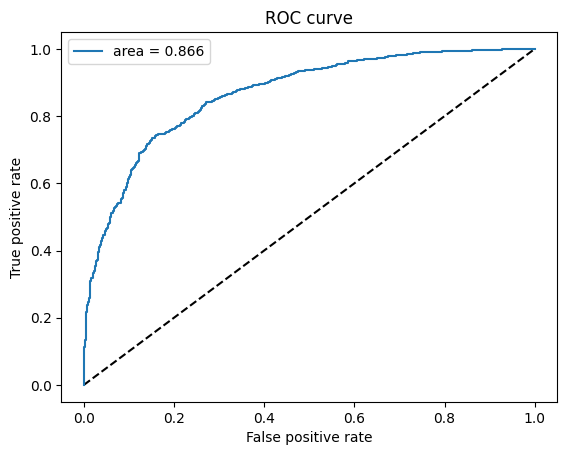

<Figure size 640x480 with 0 Axes>

In [125]:

plt.figure(1)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr_keras, tpr_keras, label='area = {:.3f}'.format(auc_keras))
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.legend(loc='best')
plt.show()
plt.savefig('Roc_Curve_myData6')
y_tru=np.round(test_gen.classes).astype(int).reshape(2367)
y_pred1=np.round(y_pred).astype(int).reshape(2367)
from sklearn.metrics import classification_report
report1 = (classification_report(y_tru, y_pred1,output_dict=True))
report_table1= pd.DataFrame(report1)
report_table1.to_csv('report_table6')

In [126]:
kernel_size = (3,3)
pool_size= (2,2)
first_filter = 16
second_filter = 32
third_filter = 64
fourth_filter= 128
fifth_filter = 256
dropout_conv = 0.1
dropout_dense = 0.3


model7 = Sequential()
model7.add(Conv2D(first_filter, kernel_size, activation = 'relu', input_shape = (image_size, image_size, 3)))
model7.add(MaxPool2D(pool_size = pool_size))
model7.add(BatchNormalization())
model7.add(Activation("relu"))
model7.add(MaxPool2D(pool_size = pool_size))
model7.add(Dropout(dropout_conv))




model7.add(Conv2D(second_filter, kernel_size, use_bias=False))
model7.add(MaxPool2D(pool_size = pool_size))
model7.add(BatchNormalization())
model7.add(Activation("relu"))
model7.add(Dropout(dropout_conv))


model7.add(Conv2D(third_filter, kernel_size, use_bias=False))
model7.add(MaxPool2D(pool_size = pool_size))
model7.add(BatchNormalization())
model7.add(Activation("relu"))
model7.add(Dropout(dropout_conv))




model7.add(Conv2D(fourth_filter, kernel_size, use_bias=False))
model7.add(MaxPool2D(pool_size = pool_size))
model7.add(BatchNormalization())
model7.add(Activation("relu"))
model7.add(Dropout(dropout_conv))



model7.add(Conv2D(fifth_filter, kernel_size, use_bias=False))
model7.add(MaxPool2D(pool_size = pool_size))
model7.add(BatchNormalization())
model7.add(Activation("relu"))
model7.add(Dropout(dropout_conv))



model7.add(Flatten())
model7.add(Dense(256, use_bias=False))
model7.add(BatchNormalization())
model7.add(Activation("relu"))
model7.add(Dropout(dropout_dense))
model7.add(Dense(1, activation = "sigmoid"))
model7.compile(Adam(0.01), loss = "binary_crossentropy", metrics=["accuracy"])
print(model7.summary())

Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_41 (Conv2D)          (None, 198, 198, 16)      448       
                                                                 
 max_pooling2d_52 (MaxPooli  (None, 99, 99, 16)        0         
 ng2D)                                                           
                                                                 
 batch_normalization_52 (Ba  (None, 99, 99, 16)        64        
 tchNormalization)                                               
                                                                 
 activation_52 (Activation)  (None, 99, 99, 16)        0         
                                                                 
 max_pooling2d_53 (MaxPooli  (None, 49, 49, 16)        0         
 ng2D)                                                           
                                                     

In [127]:
sample_numbers = len(train_df)
val_numbers = len(val_df)
train_steps = np.ceil(sample_numbers / train_batch_size)
val_steps = np.ceil(val_numbers / val_batch_size)
from keras.callbacks import EarlyStopping, ReduceLROnPlateau
earlystopper = EarlyStopping(monitor='val_accuracy', patience=3, verbose=2, restore_best_weights=True)
reducel = ReduceLROnPlateau(monitor = 'val_accuracy', factor = 0.0001, verbose = 2, patience = 1,min_lr = 0.000000001)
model_7 = model7.fit(train_gen, steps_per_epoch=train_steps, 
                    validation_data=val_gen,
                    validation_steps=val_steps,
                    epochs=50,
                    callbacks=[reducel, earlystopper])

Epoch 1/50
 476/1662 [=======>......................] - ETA: 1:00 - loss: 0.7477 - accuracy: 0.5212

c:\gitfiles\Lib\site-packages\PIL\TiffImagePlugin.py:858: UserWarning: Truncated File Read
  warnings.warn(str(msg))


1662/1662 [==============================] - 94s 55ms/step - loss: 0.6933 - accuracy: 0.5787 - val_loss: 0.6999 - val_accuracy: 0.5016 - lr: 0.0100
Epoch 2/50
1662/1662 [==============================] - 88s 53ms/step - loss: 0.6266 - accuracy: 0.6620 - val_loss: 0.5742 - val_accuracy: 0.7123 - lr: 0.0100
Epoch 3/50
1662/1662 [==============================] - ETA: 0s - loss: 0.5749 - accuracy: 0.7083
Epoch 3: ReduceLROnPlateau reducing learning rate to 9.999999776482582e-07.
1662/1662 [==============================] - 89s 53ms/step - loss: 0.5749 - accuracy: 0.7083 - val_loss: 0.5566 - val_accuracy: 0.7113 - lr: 0.0100
Epoch 4/50
1662/1662 [==============================] - 93s 56ms/step - loss: 0.5475 - accuracy: 0.7294 - val_loss: 0.5505 - val_accuracy: 0.7189 - lr: 1.0000e-06
Epoch 5/50
1662/1662 [==============================] - 93s 56ms/step - loss: 0.5441 - accuracy: 0.7314 - val_loss: 0.5448 - val_accuracy: 0.7246 - lr: 1.0000e-06
Epoch 6/50
1662/1662 [=======================

In [128]:
y_pred = model7.predict(test_gen, steps=len(test_df), verbose=1)

fpr_keras, tpr_keras, thresholds_keras = roc_curve(test_gen.classes, y_pred)
auc_keras = auc(fpr_keras, tpr_keras)
auc_keras

2367/2367 [==============================] - 9s 4ms/step


0.8309789872289872

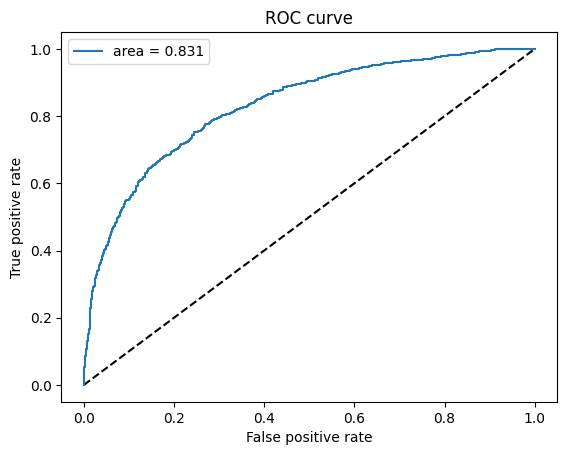

<Figure size 640x480 with 0 Axes>

In [129]:

plt.figure(1)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr_keras, tpr_keras, label='area = {:.3f}'.format(auc_keras))
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.legend(loc='best')
plt.show()
plt.savefig('Roc_Curve_myData7')
y_tru=np.round(test_gen.classes).astype(int).reshape(2367)
y_pred1=np.round(y_pred).astype(int).reshape(2367)
from sklearn.metrics import classification_report
report1 = (classification_report(y_tru, y_pred1,output_dict=True))
report_table1= pd.DataFrame(report1)
report_table1.to_csv('report_table7')